In [82]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
%matplotlib inline

In [83]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [84]:
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis= 1, inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [85]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


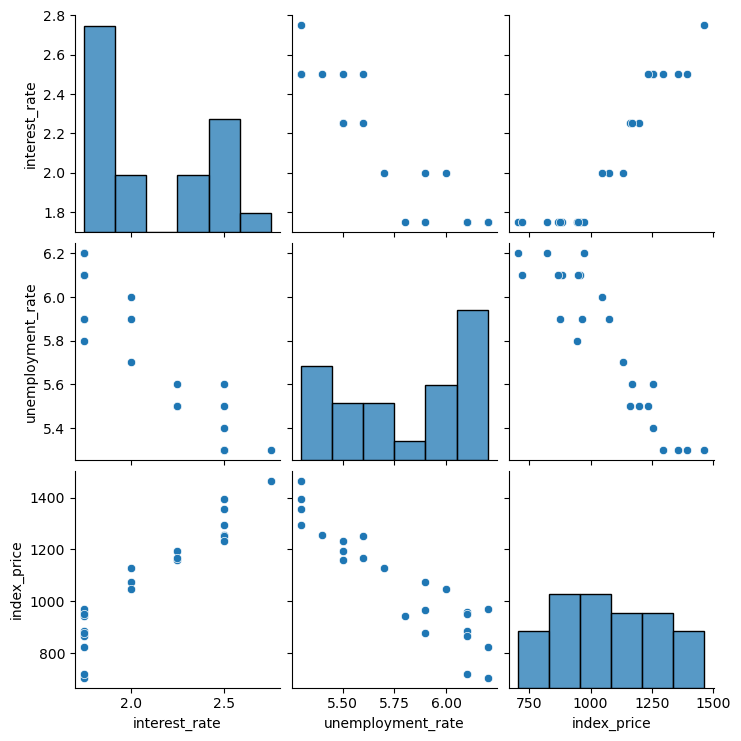

In [86]:
import seaborn as sns
sns.pairplot(df)

In [87]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

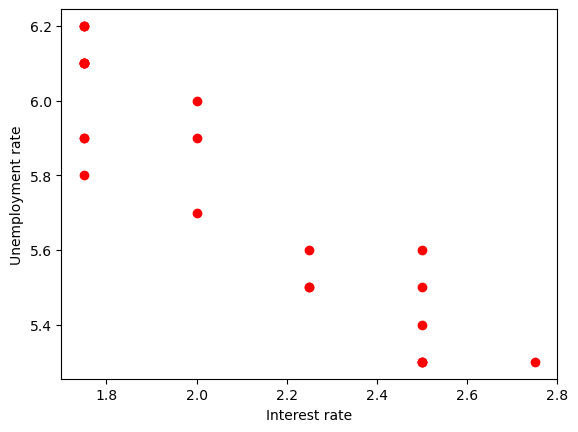

In [88]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], color= 'r')
plt.xlabel('Interest rate')
plt.ylabel('Unemployment rate')

In [89]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head(), y

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

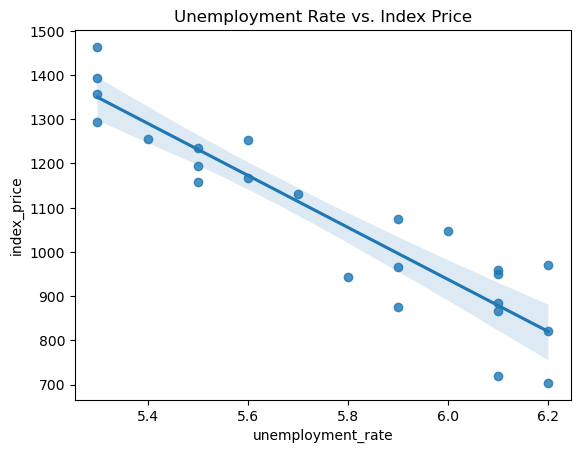

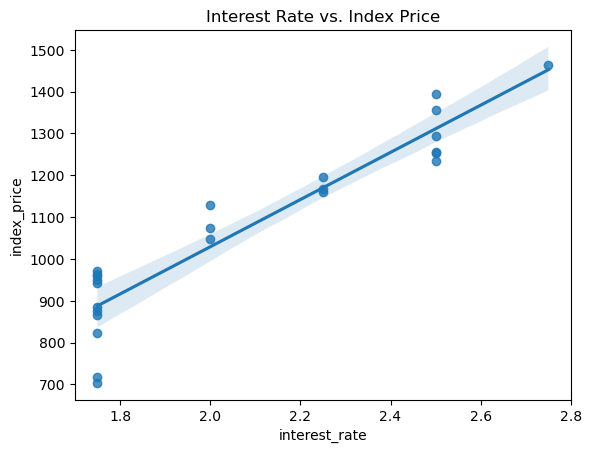

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# First plot
plt.figure()  # Creates a new figure
sns.regplot(x='unemployment_rate', y='index_price', data=df)
plt.title('Unemployment Rate vs. Index Price') 

# Second plot
plt.figure() 
sns.regplot(x='interest_rate', y='index_price', data=df)
plt.title('Interest Rate vs. Index Price') 

# Show the plots
plt.show()


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regressor, X_train, y_train, scoring= 'neg_mean_squared_error', cv = 3)

In [95]:
np.mean(validation_score)

-5674.031667186767

In [96]:
y_pred = regressor.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


6957.105303258842
71.71878409976628
83.40926389351989


In [98]:
score = r2_score(y_test, y_pred)
score

0.8254940547158574

In [99]:
adjusted_r2_score = (1 - (1 - score)*(len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1)
adjusted_r2_score

0.1509881094317147

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


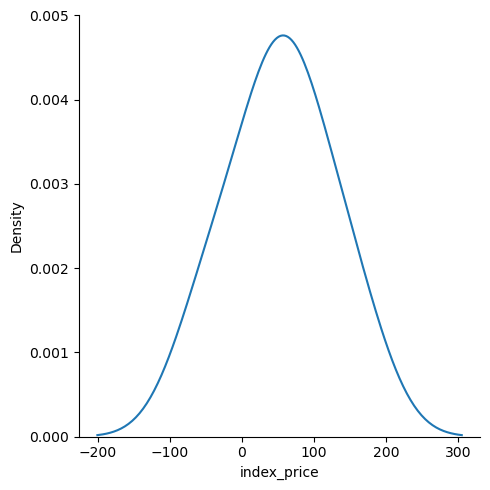

In [101]:
residuals = y_test - y_pred
sns.displot(residuals, kind= 'kde')

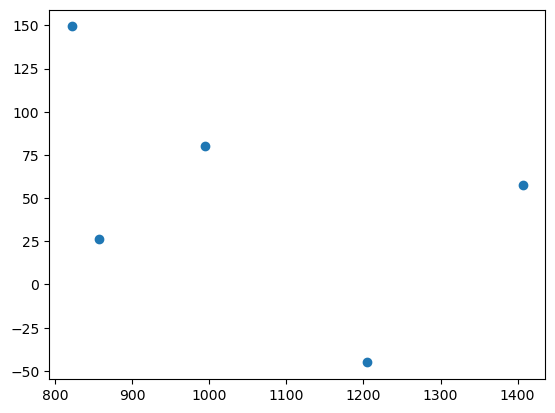

In [102]:
plt.scatter(y_pred, residuals)

In [104]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                       0.751
Time:                        22:52:53   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
regressor.coef_, regressor.intercept_

(array([  86.63351334, -114.04857249]), 1059.4210526315792)